##Importin Essential

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ast import literal_eval
from sklearn.preprocessing import QuantileTransformer

Loading Data

In [ ]:
coin_prop = pd.read_csv("/content/coinProp.csv")
table_data = pd.read_csv("/content/table_data.csv")

In [ ]:
table_data

,Rank,Name,Symbol,Market Cap,Price,Circulating Supply,volume (24h),% 1h,% 24h,% 7d,Unnamed: 10
0,"('1', None)","('Bitcoin', 'https://coinmarketcap.com/currenc...","('BTC', None)","('$507,090,156,466.71', None)","('$26,047.67', None)","('19,467,775 BTC', None)","('$12,406,045,117.51', 'https://coinmarketcap....","('0.02%', None)","('-0.44%', None)","('-0.01%', None)","('', None)"
1,"('2', None)","('Ethereum', 'https://coinmarketcap.com/curren...","('ETH', None)","('$198,709,982,386.16', None)","('$1,652.94', None)","('120,216,444 ETH *', None)","('$5,396,997,822.81', 'https://coinmarketcap.c...","('-0.03%', None)","('-0.42%', None)","('-0.48%', None)","('', None)"
2,"('3', None)","('Tether USDt', 'https://coinmarketcap.com/cur...","('USDT', None)","('$82,807,252,662.66', None)","('$0.9995', None)","('82,849,133,566 USDT *', None)","('$19,999,153,581.65', 'https://coinmarketcap....","('-0.02%', None)","('<0.01%', None)","('-0.03%', None)","('', None)"
3,"('4', None)","('BNB', 'https://coinmarketcap.com/currencies/...","('BNB', None)","('$33,590,478,887.30', None)","('$218.33', None)","('153,851,122 BNB *', None)","('$423,891,091.63', 'https://coinmarketcap.com...","('0.16%', None)","('-0.14%', None)","('1.03%', None)","('', None)"
4,"('5', None)","('XRP', 'https://coinmarketcap.com/currencies/...","('XRP', None)","('$27,845,876,512.16', None)","('$0.5262', None)","('52,914,193,551 XRP *', None)","('$1,067,427,241.27', 'https://coinmarketcap.c...","('0.04%', None)","('1.51%', None)","('3.98%', None)","('', None)"
...,...,...,...,...,...,...,...,...,...,...,...
195,"('196', None)","('PlayDapp', 'https://coinmarketcap.com/curren...","('PLA', None)","('$86,940,366.42', None)","('$0.1552', None)","('560,128,667 PLA *', None)","('$5,954,212.50', 'https://coinmarketcap.com/c...","('0.20%', None)","('-2.07%', None)","('-9.75%', None)","('', None)"
196,"('197', None)","('Pundi X (New)', 'https://coinmarketcap.com/c...","('PUNDIX', None)","('$86,996,042.68', None)","('$0.3366', None)","('258,491,637 PUNDIX', None)","('$1,388,172.99', 'https://coinmarketcap.com/c...","('0.17%', None)","('0.56%', None)","('1.78%', None)","('', None)"
197,"('198', None)","('Vulcan Forged PYR', 'https://coinmarketcap.c...","('PYR', None)","('$86,861,435.87', None)","('$3.1955', None)","('27,182,227 PYR *', None)","('$2,124,704.13', 'https://coinmarketcap.com/c...","('-0.01%', None)","('0.76%', None)","('-0.44%', None)","('', None)"
198,"('199', None)","('Status', 'https://coinmarketcap.com/currenci...","('SNT', None)","('$83,853,059.08', None)","('$0.02173', None)","('3,859,423,502 SNT *', None)","('$1,634,389.39', 'https://coinmarketcap.com/c...","('<0.01%', None)","('-0.63%', None)","('2.37%', None)","('', None)"


##Corelation between market cap and 24h valume

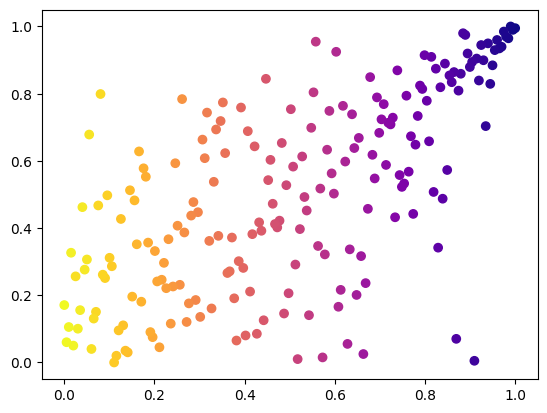

In [ ]:
market_cap = []
valume_24 = []
scaler = QuantileTransformer(n_quantiles=len(table_data))
for i in range(len(table_data)):
  market_cap.append(float(literal_eval(table_data["Market Cap"][i])[0].replace("$", '').replace(",", "_")))
  valume_24.append(float(literal_eval(table_data["volume (24h)"][i])[0].replace("$", "").replace(",", "_")))
market_cap_scaled = scaler.fit_transform(np.array(market_cap).reshape(-1, 1))
valume_24_scaled = scaler.fit_transform(np.array(valume_24).reshape(-1, 1))
plt.scatter(market_cap_scaled, valume_24_scaled, cmap="plasma", c=np.linspace(1, 201, 200));

##corelation matrix for currencies in one day

(200, 200)

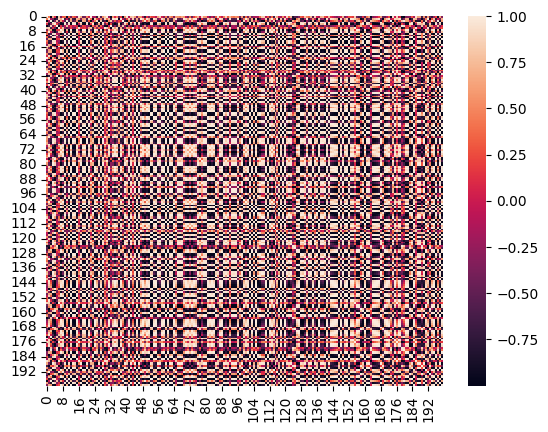

In [ ]:
h1_h7_h24 = []
for i in range(200):
  one = float(literal_eval(table_data["% 1h"][i])[0].replace("%", "").replace("<", ""))
  seven = float(literal_eval(table_data["% 7d"][i])[0].replace("%", "").replace("<", ""))
  twenty_four = float(literal_eval(table_data["% 24h"][i])[0].replace("%", ""). replace("<", ""))
  h1_h7_h24.append([one, seven, twenty_four])

cov_matrix = np.corrcoef(h1_h7_h24, rowvar=True)
sns.heatmap(cov_matrix);

##Which currancies had the most covariance during one day(top 30)

In [ ]:
np.fill_diagonal(cov_matrix, -500)
#finding and indexing top 30 currancies from top to bottom
top_30 = np.unravel_index(np.argsort(cov_matrix, axis=None)[-60:][::-1], cov_matrix.shape)
list_of_top_30 = zip(top_30[0], top_30[1])
#geting the names
names = []
for i in range(200):
  names.append(literal_eval(table_data["Name"][i])[0])
#finding relative name for each index
top_30_paires = []
for i, j in list_of_top_30:
  top_30_paires.append(tuple(sorted([names[i], names[j]])))
top_30_paires = list(dict.fromkeys(top_30_paires))

top_30_paires

[('Binance USD', 'Internet Computer'),
 ('Dai', 'GateToken'),
 ('MAGIC', 'Ribbon Finance'),
 ('Cartesi', 'Quant'),
 ('THORChain', 'XDC Network'),
 ('ApeCoin', 'Arweave'),
 ('Mask Network', 'aelf'),
 ('MX TOKEN', 'NEAR Protocol'),
 ('Status', 'WAX'),
 ('Ethereum Classic', 'WOO Network'),
 ('Mantle', 'SKALE'),
 ('MultiversX', 'Shiba Inu'),
 ('Fantom', 'Status'),
 ('BORA', 'Maker'),
 ('BitTorrent(New)', 'DAO Maker'),
 ('Amp', 'Loopring'),
 ('Harmony', 'Neo'),
 ('Dash', 'Helium'),
 ('Fantom', 'WAX'),
 ('Aave', 'Golem'),
 ('Axie Infinity', 'Lido DAO'),
 ('Ethereum', 'Frax Share'),
 ('Osmosis', 'XDC Network'),
 ('0x Protocol', 'Trust Wallet Token'),
 ('Osmosis', 'THORChain'),
 ('BNB', 'Lisk'),
 ('Ethereum Classic', 'USDD'),
 ('Loopring', 'PancakeSwap'),
 ('Core', 'Immutable'),
 ('EOS', 'Toncoin')]

In [ ]:
table_data

,Rank,Name,Symbol,Market Cap,Price,Circulating Supply,volume (24h),% 1h,% 24h,% 7d,Unnamed: 10
0,"('1', None)","('Bitcoin', 'https://coinmarketcap.com/currenc...","('BTC', None)","('$507,090,156,466.71', None)","('$26,047.67', None)","('19,467,775 BTC', None)","('$12,406,045,117.51', 'https://coinmarketcap....","('0.02%', None)","('-0.44%', None)","('-0.01%', None)","('', None)"
1,"('2', None)","('Ethereum', 'https://coinmarketcap.com/curren...","('ETH', None)","('$198,709,982,386.16', None)","('$1,652.94', None)","('120,216,444 ETH *', None)","('$5,396,997,822.81', 'https://coinmarketcap.c...","('-0.03%', None)","('-0.42%', None)","('-0.48%', None)","('', None)"
2,"('3', None)","('Tether USDt', 'https://coinmarketcap.com/cur...","('USDT', None)","('$82,807,252,662.66', None)","('$0.9995', None)","('82,849,133,566 USDT *', None)","('$19,999,153,581.65', 'https://coinmarketcap....","('-0.02%', None)","('<0.01%', None)","('-0.03%', None)","('', None)"
3,"('4', None)","('BNB', 'https://coinmarketcap.com/currencies/...","('BNB', None)","('$33,590,478,887.30', None)","('$218.33', None)","('153,851,122 BNB *', None)","('$423,891,091.63', 'https://coinmarketcap.com...","('0.16%', None)","('-0.14%', None)","('1.03%', None)","('', None)"
4,"('5', None)","('XRP', 'https://coinmarketcap.com/currencies/...","('XRP', None)","('$27,845,876,512.16', None)","('$0.5262', None)","('52,914,193,551 XRP *', None)","('$1,067,427,241.27', 'https://coinmarketcap.c...","('0.04%', None)","('1.51%', None)","('3.98%', None)","('', None)"
...,...,...,...,...,...,...,...,...,...,...,...
195,"('196', None)","('PlayDapp', 'https://coinmarketcap.com/curren...","('PLA', None)","('$86,940,366.42', None)","('$0.1552', None)","('560,128,667 PLA *', None)","('$5,954,212.50', 'https://coinmarketcap.com/c...","('0.20%', None)","('-2.07%', None)","('-9.75%', None)","('', None)"
196,"('197', None)","('Pundi X (New)', 'https://coinmarketcap.com/c...","('PUNDIX', None)","('$86,996,042.68', None)","('$0.3366', None)","('258,491,637 PUNDIX', None)","('$1,388,172.99', 'https://coinmarketcap.com/c...","('0.17%', None)","('0.56%', None)","('1.78%', None)","('', None)"
197,"('198', None)","('Vulcan Forged PYR', 'https://coinmarketcap.c...","('PYR', None)","('$86,861,435.87', None)","('$3.1955', None)","('27,182,227 PYR *', None)","('$2,124,704.13', 'https://coinmarketcap.com/c...","('-0.01%', None)","('0.76%', None)","('-0.44%', None)","('', None)"
198,"('199', None)","('Status', 'https://coinmarketcap.com/currenci...","('SNT', None)","('$83,853,059.08', None)","('$0.02173', None)","('3,859,423,502 SNT *', None)","('$1,634,389.39', 'https://coinmarketcap.com/c...","('<0.01%', None)","('-0.63%', None)","('2.37%', None)","('', None)"


<BarContainer object of 23 artists>

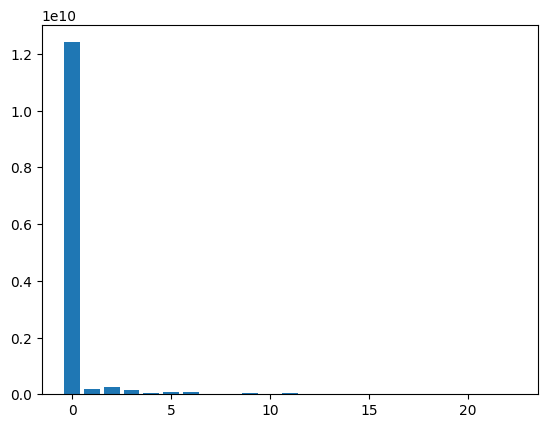

In [ ]:
index = []
for i in range(200):
  try:
    tag = literal_eval(coin_prop["Tags"][i])[0]
    if tag == "mineable":
      index.append(i)
  except:
    pass
list_of_values = []
for i in index:
  list_of_values.append(float(literal_eval(table_data["volume (24h)"][i])[0].replace("$", "").replace(",", "_")))
plt.bar(range(23), list_of_values);

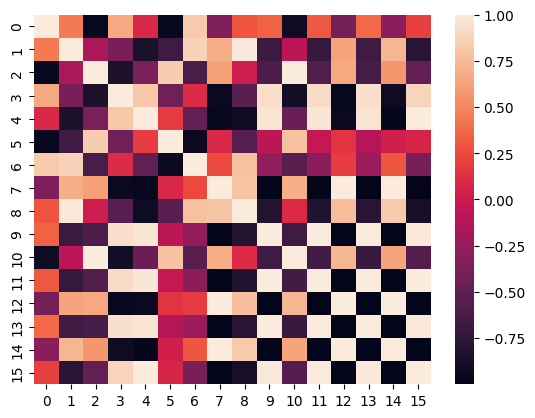

In [ ]:
top_16_curr = []
for i in np.argsort(market_cap)[-16:][::-1]:
  top_16_curr.append(h1_h7_h24[i])

sns.heatmap(np.corrcoef(top_16_curr));

,Name;timeOpen;timeClose;timeHigh;timeLow;open;high;low;close;volume;marketCap;timestamp
0,Ethereum;2023-09-01T00:00:00.000Z;2023-09-01T2...
